Compare model wind speed with measurements

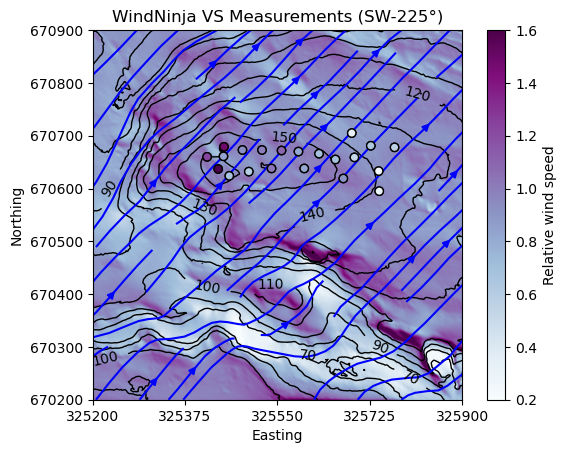

In [8]:
# Measurement Day 1
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from osgeo import gdal
from scipy.interpolate import interpn

# contour map
gdal.UseExceptions()
ds = gdal.Open('Blackford_2M_DTM_PHASE5.tif')
xul, dx, _, yul, _, _ = ds.GetGeoTransform()
band = ds.GetRasterBand(1)
z = band.ReadAsArray()
z = z[::-1,:]
ny, nx = z.shape
x = xul + np.arange(nx)*dx
y = yul - (ny - np.arange(ny))*dx
cs = plt.contour(x,y,z,colors='k',levels=np.arange(0,200,10),linewidths=1)
plt.clabel(cs,fmt='%d')
plt.xlim(325200,325900)
plt.xticks(np.linspace(325200, 325900, num=5))
plt.ylim(670200,670900) 
plt.xlabel('Easting')
plt.ylabel('Northing')

# WindNinja flow lines
vel = np.loadtxt('Blackford_2M_DTM_PHASE5_225_1_2m_vel.asc',skiprows=6)[:ny,:nx]
ang = np.loadtxt('Blackford_2M_DTM_PHASE5_225_1_2m_ang.asc',skiprows=6)[:ny,:nx]
vel = vel[::-1,:]
ang = ang[::-1,:]
u = - vel*np.sin(np.radians(ang))
v = - vel*np.cos(np.radians(ang))
summit = np.array((325437,670639))
points = (x,y)
vel = vel/interpn(points,vel,summit)
plt.streamplot(x,y,u,v,color='b')
plt.imshow(vel,extent=(x.min(),x.max(),y.min(),y.max()),origin='lower',vmin=0.2,vmax=1.6, cmap='BuPu')
plt.colorbar(label = 'Relative wind speed')

# measurements
df = pd.read_csv('BlackfordWindDataFull.csv')

# wind speeds from anemometer counts with June 1999 calibration
mcount = [2.6115, 2.4474, 2.5303]
mcount_uncertainty = [0.39, 0, 0.50]  # Uncertainties for anemometer 986 and 1280
df['a_speed1'] = df['ANEMOMETER 986 #TURNS'] * mcount[0] / 60 
#df['a_speed2'] = df['ANEMOMETER 1280 #TURNS'] * mcount[2] / 60 
# Propagate uncertainty (relative uncertainty from calibration constants)
df['a_speed1_unc'] = df['a_speed1'] * (mcount_uncertainty[0] / mcount[0])
#df['a_speed2_unc'] = df['a_speed2'] * (mcount_uncertainty[2] / mcount[2])

# anemometer wind speeds relative to summit Kestrel
df['a_speed1'] = df['a_speed1'] / df['KESTREL WINDSPEED']
#df['a_speed2'] = df['a_speed2'] / df['KESTREL WINDSPEED']
df['a_speed1_unc'] /= df['KESTREL WINDSPEED']
#df['a_speed2_unc'] /= df['KESTREL WINDSPEED']

# anemometer locations coloured by relative wind speed
xa = df['ANEMOMETER 986 LAT'] + 300000
ya = df['ANEMOMETER 986 LON'] + 600000
Ua = df['a_speed1']
Ua_unc = df['a_speed1_unc']  # Uncertainties
plt.scatter(xa,ya,c=Ua,edgecolors='k',vmin=0.2,vmax=1.6,zorder=3, cmap='BuPu')
plt.title("WindNinja VS Measurements (SW-225°)")

# anemometer locations coloured by relative wind speed
xa2 = df['ANEMOMETER 986 LAT'] + 300000
ya2 = df['ANEMOMETER 986 LON'] + 600000
Ua2 = df['a_speed1']
Ua_unc2 = df['a_speed1_unc']  # Uncertainties
plt.scatter(xa2,ya2,c=Ua2,edgecolors='k',vmin=0.2,vmax=1.6,zorder=3, cmap='BuPu')

# model wind speed at valid measurement points
xa = xa[~np.isnan(xa)]
ya = ya[~np.isnan(ya)]
Ua = Ua[~np.isnan(Ua)]
Ua_unc = Ua_unc[~np.isnan(Ua_unc)]
Um = interpn(points,vel,(xa,ya))

xa2 = xa2[~np.isnan(xa2)]
ya2 = ya2[~np.isnan(ya2)]
Ua2 = Ua2[~np.isnan(Ua2)]
Ua_unc2 = Ua_unc2[~np.isnan(Ua_unc2)]
Um2 = interpn(points,vel,(xa2,ya2))

plt.savefig('day1map.png')

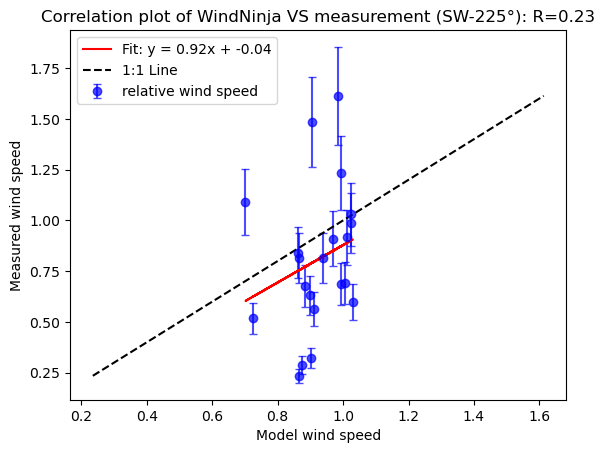

In [9]:
from scipy.stats import linregress
# Compute linear regression
slope, intercept, r_value, _, _ = linregress(Um, Ua)
line = slope * Um + intercept  # Compute the best-fit line
# Define 1:1 line
min_val, max_val = min(Um.min(), Ua.min()), max(Um.max(), Ua.max())  # Ensure full coverage
one_to_one = np.linspace(min_val, max_val, 100)

#Plotting 
plt.figure()
plt.errorbar(Um, Ua, yerr=Ua_unc, fmt='o', capsize=3, label="relative wind speed", color='blue', alpha=0.7)
plt.plot(Um, line, color="red", label=f"Fit: y = {slope:.2f}x + {intercept:.2f}")
plt.plot(one_to_one, one_to_one, 'k--', label="1:1 Line")  # Dashed black line for y=x
plt.xlabel('Model wind speed')
plt.ylabel('Measured wind speed')
plt.title(f"Correlation plot of WindNinja VS measurement (SW-225°): R={r_value:.2f}")
plt.legend()
plt.savefig('leewardday1.png')
plt.show()


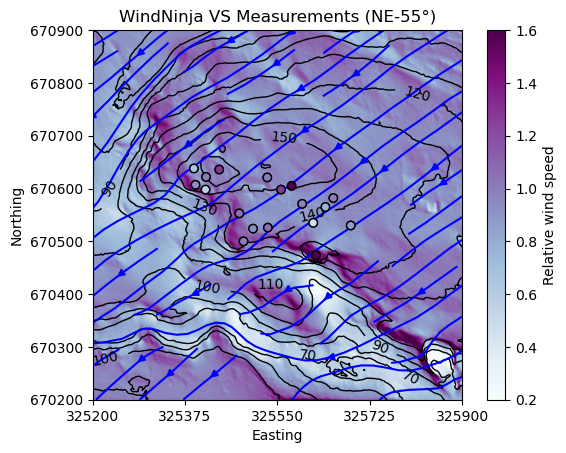

In [10]:
# Measurement Day 2
# contour map
gdal.UseExceptions()
ds = gdal.Open('Blackford_2M_DTM_PHASE5.tif')
xul, dx, _, yul, _, _ = ds.GetGeoTransform()
band = ds.GetRasterBand(1)
z = band.ReadAsArray()
z = z[::-1,:]
ny, nx = z.shape
x = xul + np.arange(nx)*dx
y = yul - (ny - np.arange(ny))*dx
cs = plt.contour(x,y,z,colors='k',levels=np.arange(0,200,10),linewidths=1)
plt.clabel(cs,fmt='%d')
plt.xlim(325200,325900)
plt.xticks(np.linspace(325200, 325900, num=5))
plt.ylim(670200,670900) 
plt.xlabel('Easting')
plt.ylabel('Northing')

# WindNinja flow lines
vel_2 = np.loadtxt('Blackford_2M_DTM_PHASE5_55_1_2m_vel.asc',skiprows=6)[:ny,:nx]
ang_2 = np.loadtxt('Blackford_2M_DTM_PHASE5_55_1_2m_ang.asc',skiprows=6)[:ny,:nx]
vel_2 = vel_2[::-1,:]
ang_2 = ang_2[::-1,:]
u_2 = - vel_2*np.sin(np.radians(ang_2))
v_2 = - vel_2*np.cos(np.radians(ang_2))
summit = np.array((325437,670639))
points = (x,y)
vel_2 = vel_2/interpn(points,vel_2,summit)
plt.streamplot(x,y,u_2,v_2,color='b')
plt.imshow(vel_2,extent=(x.min(),x.max(),y.min(),y.max()),origin='lower',vmin=0.2,vmax=1.6, cmap='BuPu')
plt.colorbar(label = 'Relative wind speed')


# measurements
df = pd.read_csv('BlackfordWindDataFullDay2.csv')

# wind speeds from anemometer counts with June 1999 calibration
mcount = [2.6115, 2.4474, 2.5303]
mcount_uncertainty = [0.39, 0, 0.50]  # Uncertainties for anemometer 986 and 1280
df['a_speed1'] = df['ANEMOMETER 986 #TURNS'] * mcount[0] / 60 
#df['a_speed2'] = df['ANEMOMETER 1280 #TURNS'] * mcount[2] / 60 
# Propagate uncertainty (relative uncertainty from calibration constants)
df['a_speed1_unc'] = df['a_speed1'] * (mcount_uncertainty[0] / mcount[0])
#df['a_speed2_unc'] = df['a_speed2'] * (mcount_uncertainty[2] / mcount[2])

# anemometer wind speeds relative to summit Kestrel
df['a_speed1'] = df['a_speed1'] / df['KESTREL WINDSPEED']
#df['a_speed2'] = df['a_speed2'] / df['KESTREL WINDSPEED']
df['a_speed1_unc'] /= df['KESTREL WINDSPEED']
#df['a_speed2_unc'] /= df['KESTREL WINDSPEED']

# anemometer locations coloured by relative wind speed
xa_2 = df['ANEMOMETER 986 LAT'] + 300000
ya_2 = df['ANEMOMETER 986 LON'] + 600000
Ua_2 = df['a_speed1']
Ua_unc_2 = df['a_speed1_unc']  # Uncertainties
plt.scatter(xa_2,ya_2,c=Ua_2,edgecolors='k',vmin=0.2,vmax=1.6,zorder=3, cmap='BuPu')
plt.title("WindNinja VS Measurements (NE-55°)")

# anemometer locations coloured by relative wind speed
xa_22 = df['ANEMOMETER 986 LAT'] + 300000
ya_22 = df['ANEMOMETER 986 LON'] + 600000
Ua_22 = df['a_speed1']
Ua_unc_22 = df['a_speed1_unc']  # Uncertainties
plt.scatter(xa_22,ya_22,c=Ua_22,edgecolors='k',vmin=0.2,vmax=1.6,zorder=3, cmap='BuPu')

# model wind speed at valid measurement points
xa_2 = xa_2[~np.isnan(xa_2)]
ya_2 = ya_2[~np.isnan(ya_2)]
Ua_2 = Ua_2[~np.isnan(Ua_2)]
Ua_unc_2 = Ua_unc_2[~np.isnan(Ua_unc_2)]
Um_2 = interpn(points,vel_2,(xa_2,ya_2))

# model wind speed at valid measurement points
xa_22 = xa_22[~np.isnan(xa_22)]
ya_22 = ya_22[~np.isnan(ya_22)]
Ua_22 = Ua_22[~np.isnan(Ua_22)]
Ua_unc_22 = Ua_unc_2[~np.isnan(Ua_unc_22)]
Um_22 = interpn(points,vel_2,(xa_22,ya_22))

plt.savefig('day2map.png')


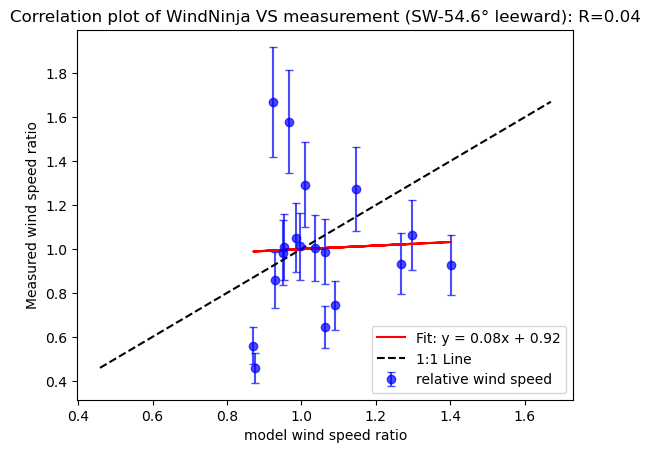

In [11]:
from scipy.stats import linregress
# Compute linear regression
slope, intercept, r_value, _, _ = linregress(Um_2, Ua_2)
line = slope * Um_2 + intercept  # Compute the best-fit line
# Define 1:1 line
min_val, max_val = min(Um_2.min(), Ua_2.min()), max(Um_2.max(), Ua_2.max())  # Ensure full coverage
one_to_one = np.linspace(min_val, max_val, 100)

#Plotting 
plt.figure()
plt.errorbar(Um_2, Ua_2, yerr=Ua_unc_2, fmt='o', capsize=3, label="relative wind speed", color='blue', alpha=0.7)
plt.plot(Um_2, line, color="red", label=f"Fit: y = {slope:.2f}x + {intercept:.2f}")
plt.plot(one_to_one, one_to_one, 'k--', label="1:1 Line")  # Dashed black line for y=x
plt.xlabel('model wind speed ratio')
plt.ylabel('Measured wind speed ratio')
plt.title(f"Correlation plot of WindNinja VS measurement (SW-54.6° leeward): R={r_value:.2f}")
plt.savefig('leewardday2.png')
plt.legend()
plt.show()